# **Tourism Recommendation System**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

## Upload and Loading Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tourism_filtering.csv to tourism_filtering.csv


In [3]:
dataset = pd.read_csv('tourism_filtering.csv')

In [4]:
dataset.head()

,Place_Id,Tourist_Id,Rating
0,1,1,4.2
1,1,2,4.5
2,1,3,4.5
3,1,4,4.5
4,1,5,4.4


In [5]:
dataset.shape

(9800, 3)

## Split Data

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [7]:
train.head()

,Place_Id,Tourist_Id,Rating
3984,200,145,4.7
4824,242,25,3.9
1414,71,135,4.5
540,28,221,5.0
6522,327,123,3.3


In [8]:
test.head()

,Place_Id,Tourist_Id,Rating
532,27,213,3.3
872,44,233,5.0
1149,58,190,3.7
2287,115,48,3.3
4038,202,199,4.5


In [9]:
n_tourists = len(dataset.Tourist_Id.unique())
n_tourists

320

In [10]:
n_places = len(dataset.Place_Id.unique())
n_places

490

## Creating Dot Product Model

In [11]:
# creating place embedding path
place_input = Input(shape=[1], name="Place-Input")
place_embedding = Embedding(n_places+1, 5, name="Place-Embedding")(place_input)
place_vec = Flatten(name="Flatten-Places")(place_embedding)

# creating tourist embedding path
tourist_input = Input(shape=[1], name="Tourist-Input")
tourist_embedding = Embedding(n_tourists+1, 5, name="User-Embedding")(tourist_input)
tourist_vec = Flatten(name="Flatten-Tourists")(tourist_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([place_vec, tourist_vec])
model = Model([tourist_input, place_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/30
245/245 [==============================] - 1s 2ms/step - loss: 16.7781
Epoch 2/30
245/245 [==============================] - 0s 2ms/step - loss: 16.6185
Epoch 3/30
245/245 [==============================] - 0s 2ms/step - loss: 15.7242
Epoch 4/30
245/245 [==============================] - 0s 2ms/step - loss: 13.8376
Epoch 5/30
245/245 [==============================] - 0s 2ms/step - loss: 11.3874
Epoch 6/30
245/245 [==============================] - 0s 2ms/step - loss: 8.8117
Epoch 7/30
245/245 [==============================] - 0s 2ms/step - loss: 6.4080
Epoch 8/30
245/245 [==============================] - 0s 2ms/step - loss: 4.3692
Epoch 9/30
245/245 [==============================] - 1s 4ms/step - loss: 2.7973
Epoch 10/30
245/245 [==============================] - 1s 3ms/step - loss: 1.7016
Epoch 11/30
245/245 [==============================] - 1s 3ms/step - loss: 1.0178
Epoch 12/30
245/245 [==============================] - 0s 2ms/step - loss: 0.6398
Epoch 13/30
245/245 

Text(0, 0.5, 'Training Error')

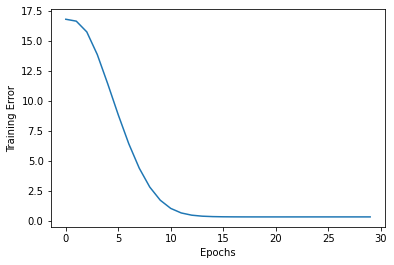

In [12]:
history = model.fit([train.Tourist_Id, train.Place_Id], train.Rating, epochs=30, verbose=1)
model.save('recommendation_model.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [13]:
model.evaluate([test.Tourist_Id, test.Place_Id], test.Rating)

62/62 [==============================] - 0s 2ms/step - loss: 0.3843


0.38426473736763

## Creating Neural Network Model

In [17]:
# creating place embedding path
place_input = Input(shape=[1], name="Place-Input")
place_embedding = Embedding(n_places+1, 5, name="Place-Embedding")(place_input)
place_vec = Flatten(name="Flatten-Places")(place_embedding)

# creating user embedding path
tourist_input = Input(shape=[1], name="Tourist-Input")
tourist_embedding = Embedding(n_tourists+1, 5, name="Tourist-Embedding")(tourist_input)
tourist_vec = Flatten(name="Flatten-Tourist")(tourist_embedding)

# concatenate features
conc = Concatenate()([place_vec, tourist_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([tourist_input, place_input], out)
model2.compile('adam', 'mean_squared_error')

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Place-Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Tourist-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Place-Embedding (Embedding)    (None, 1, 5)         2455        ['Place-Input[0][0]']            
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         1605        ['Tourist-Input[0][0]']          
                                                                                              

Epoch 1/30
245/245 [==============================] - 2s 4ms/step - loss: 3.1855
Epoch 2/30
245/245 [==============================] - 1s 3ms/step - loss: 0.3381
Epoch 3/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3224
Epoch 4/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3184
Epoch 5/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3155
Epoch 6/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3144
Epoch 7/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3129
Epoch 8/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3121
Epoch 9/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3115
Epoch 10/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3092
Epoch 11/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3050
Epoch 12/30
245/245 [==============================] - 1s 2ms/step - loss: 0.3006
Epoch 13/30
245/245 [====

Text(0, 0.5, 'Training Error')

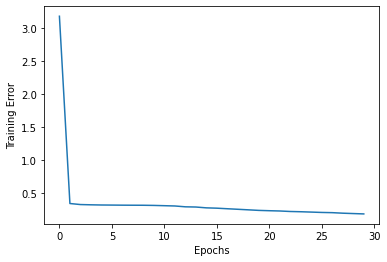

In [19]:
history = model2.fit([train.Tourist_Id, train.Place_Id], train.Rating, epochs=30, verbose=1)
model2.save('recommendation_model2.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [21]:
model2.evaluate([test.Tourist_Id, test.Place_Id], test.Rating)

62/62 [==============================] - 1s 4ms/step - loss: 0.5345


0.5344756841659546

## Predict Recommendation

In [29]:
# Creating dataset for predict recommendations
place_data = np.array(list(set(dataset.Place_Id)))
place_data[:132]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132])

In [30]:
tourist_id = 276

tourist = np.array([tourist_id for i in range(len(place_data))])
tourist[:5]

array([276, 276, 276, 276, 276])

In [31]:
predictions = model.predict([tourist, place_data])

predictions = np.array([a[0] for a in predictions])

recommended_place_ids = (-predictions).argsort()[:5]

recommended_place_ids

array([13, 33, 17, 29,  1])

In [32]:
predictions[recommended_place_ids]

array([4.7901154, 4.4904656, 4.3999157, 4.283978 , 4.2357855],
      dtype=float32)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving tourism_description.csv to tourism_description.csv


In [34]:
tourism_spot = pd.read_csv('tourism_description.csv')

In [35]:
tourism_spot.head()

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.4
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.5
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.4


In [37]:
tourism_spot[tourism_spot['Place_Id'].isin(recommended_place_ids)]

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
12,13,Pulau Pramuka,Pulau Pramuka merupakan salah satu pulau yang ...,Bahari,Jakarta,4.2
16,17,Museum Fatahillah,Museum Fatahillah memiliki nama resmi Museum S...,Budaya,Jakarta,4.4
28,29,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,4.8
32,33,Taman Suropati,Taman Suropati (awalnya bernama Burgemeester B...,Taman Hiburan,Jakarta,4.6
